In [1]:
import pandas as pd

In [107]:
stackQuestions = pd.read_csv('Stack Questions New.csv', encoding='latin1')

In [108]:
stackQuestions["CreationDate"] = pd.to_datetime(stackQuestions["CreationDate"])
stackQuestions["ClosedDate"] = pd.to_datetime(stackQuestions["ClosedDate"])
stackQuestions["DeletionDate"] = pd.to_datetime(stackQuestions["DeletionDate"])

In [109]:
#NaT is missing values
stackQuestions["AnswerCount"] = stackQuestions["AnswerCount"].fillna(-1)
stackQuestions["AnswerCount"] = stackQuestions["AnswerCount"].astype(int)

In [110]:
#apply same time frame (15 Oct 2008 to 12 Oct 2016)
from datetime import datetime
mask = (stackQuestions['CreationDate'] >= datetime.strptime('2008-10-15', '%Y-%m-%d')) & (stackQuestions['CreationDate'] <= datetime.strptime('2016-10-12', '%Y-%m-%d'))

In [111]:
stackQuestions = stackQuestions.loc[mask]

In [112]:
stackQuestions = stackQuestions.drop('Tags', axis=1)

In [113]:
stackQuestions.rename(columns = {'Id':'QuestionId', 'OwnerUserId':'QuestUserId', 'CreationDate':'QuestCreationDate', 'Score':'QuestScore', 'ClosedDate':'QuestClosedDate', 'DeletionDate':'QuestDeletionDate'}, inplace=True)

In [114]:
#remove closed and deleted questions
stackQuestions = stackQuestions[stackQuestions['QuestClosedDate'].isnull() & stackQuestions['QuestDeletionDate'].isnull()]

In [115]:
%store stackQuestions

Stored 'stackQuestions' (DataFrame)


In [116]:
#this info can be found in stackQuestions
stackQuestionTags = pd.read_csv('Stack Question Tags.csv', encoding='latin1')

In [117]:
stackQuestionTags.rename(columns = {'Id':'QuestionId', 'Tag':'QuestTags'}, inplace=True)
%store stackQuestionTags

Stored 'stackQuestionTags' (DataFrame)


In [118]:
stackQuestionsWTags = pd.merge(stackQuestions, stackQuestionTags, on='QuestionId')

In [119]:
#each row is one question tag (can have multiple same questionid)
stackQuestionsWTags.head()

,QuestionId,QuestCreationDate,QuestClosedDate,QuestDeletionDate,QuestScore,QuestUserId,AnswerCount,QuestTags
0,203274,2008-10-15 00:02:04,NaT,NaT,4,9021.0,4,css
1,203274,2008-10-15 00:02:04,NaT,NaT,4,9021.0,4,performance
2,203274,2008-10-15 00:02:04,NaT,NaT,4,9021.0,4,optimization
3,203275,2008-10-15 00:02:19,NaT,NaT,8,25228.0,3,events
4,203275,2008-10-15 00:02:19,NaT,NaT,8,25228.0,3,esp


In [120]:
stackSampleQuestions = pd.read_csv('SampleQuestions.csv', encoding='latin1')

In [121]:
stackSampleQuestions.rename(columns={'Id':'QuestionId', 'OwnerUserId':'QuestUserId', 'CreationDate':'QuestCreationDate', 'ClosedDate':'QuestClosedDate', 'Score':'QuestScore', 'Body':'QuestBody', 'Title':'QuestTitle'}, inplace=True)

In [122]:
stackSampleQuestions["QuestCreationDate"] = pd.to_datetime(stackSampleQuestions["QuestCreationDate"])

In [123]:
#regex
import re

def cleanhtml(raw_html):
  cleanr = re.compile('<.*?>')
  cleantext = re.sub(cleanr, '', raw_html)
  return cleantext

In [124]:
#clean text
for i in range(0, len(stackSampleQuestions)):
    x = cleanhtml(stackSampleQuestions['QuestBody'][i])
    stackSampleQuestions.set_value(i, 'QuestBody', cleanhtml(x))

In [125]:
mask4 = (stackSampleQuestions['QuestCreationDate'] >= datetime.strptime('2008-10-15', '%Y-%m-%d')) & (stackSampleQuestions['QuestCreationDate'] <= datetime.strptime('2016-10-12', '%Y-%m-%d'))

In [126]:
stackSampleQuestions = stackSampleQuestions.loc[mask4]

In [127]:
stackSampleQuestions = stackSampleQuestions[stackSampleQuestions['QuestClosedDate'].isnull()]

In [128]:
%store stackSampleQuestions

Stored 'stackSampleQuestions' (DataFrame)


In [129]:
commonQuestions = stackSampleQuestions[stackSampleQuestions.QuestionId.isin(stackQuestions.QuestionId)]

In [130]:
commonQuestions = stackQuestionsWTags[stackQuestionsWTags.QuestionId.isin(commonQuestions.QuestionId)]

In [131]:
commonQuestions.QuestionId.unique().shape #only 1 QuestionId is found in stackSampleQuestions but not in stackQuestions.

(1199848,)

In [132]:
commonQuestions = commonQuestions.copy()

In [133]:
#will have warning, but still does what it should
commonQuestions['QuestCreationYear'] = pd.DatetimeIndex(commonQuestions['QuestCreationDate']).year

In [134]:
commonQuestions.head()

,QuestionId,QuestCreationDate,QuestClosedDate,QuestDeletionDate,QuestScore,QuestUserId,AnswerCount,QuestTags,QuestCreationYear
34,203340,2008-10-15 00:35:54,NaT,NaT,32,27580.0,11,jquery,2008
118,203520,2008-10-15 02:19:28,NaT,NaT,2,5496.0,2,.net,2008
119,203520,2008-10-15 02:19:28,NaT,NaT,2,5496.0,2,winforms,2008
120,203520,2008-10-15 02:19:28,NaT,NaT,2,5496.0,2,data-binding,2008
142,203590,2008-10-15 03:05:53,NaT,NaT,0,361.0,2,visual-studio,2008


In [30]:
import seaborn as sns

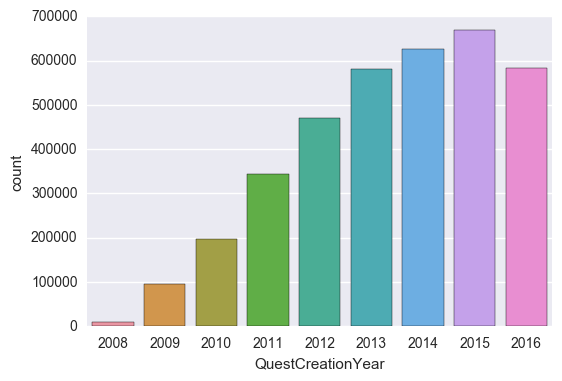

In [137]:
#number of tags used over the years
%matplotlib inline
ax = sns.countplot(x="QuestCreationYear", data=commonQuestions)

In [138]:
#36763 unique QuestTags, tail(23300)
yearQuestTag = pd.DataFrame(commonQuestions.groupby('QuestCreationYear').QuestTags.value_counts().rename('YearTagCount')).reset_index()

In [139]:
%store yearQuestTag

Stored 'yearQuestTag' (DataFrame)


In [140]:
commonQuestions.groupby('QuestCreationYear').QuestTags

In [141]:
topYearQuestTag = yearQuestTag.groupby(['QuestCreationYear']).head(10)

In [142]:
%store topYearQuestTag

Stored 'topYearQuestTag' (DataFrame)


In [143]:
commonQuestions[commonQuestions.QuestTags == 'javascript'].groupby('QuestCreationYear').QuestTags.value_counts().sum()

116961

In [144]:
import matplotlib.pyplot as plt

In [145]:
from bokeh.charts import Bar, show, output_notebook

output_notebook()

palette = ['#4B0082','#FF6347','#F0E68C','#E6E6FA','#FFF0F5','#90EE90','#ADD8E6','#F08080','#D3D3D3','#FFB6C1','#87CEFA','#20B2AA','#FFA07A','#778899','#9370DB','#40E0D0']

bar = Bar(topYearQuestTag, values='YearTagCount', label='QuestCreationYear', stack='QuestTags',
          title='Top 10 Tags Used Throughout the Year', 
             legend='top_right',bar_width=1.0, palette=palette)

bar.xaxis.axis_label = 'Year in which Question was Created'
bar.yaxis.axis_label = 'Number of Various Tags Used in Questions'

show(bar)

Loading BokehJS ...

In [146]:
commonQuestions.sort_values(by='QuestScore', ascending=False).head() #top upvoted questions

,QuestionId,QuestCreationDate,QuestClosedDate,QuestDeletionDate,QuestScore,QuestUserId,AnswerCount,QuestTags,QuestCreationYear
66750,348170,2008-12-07 21:57:46,NaT,NaT,5173,14069.0,28,git,2008
66751,348170,2008-12-07 21:57:46,NaT,NaT,5173,14069.0,28,version-control,2008
66752,348170,2008-12-07 21:57:46,NaT,NaT,5173,14069.0,28,git-stage,2008
92761,406230,2009-01-02 07:30:16,NaT,NaT,2527,36830.0,20,regex-negation,2009
92760,406230,2009-01-02 07:30:16,NaT,NaT,2527,36830.0,20,regex,2009


In [147]:
commonQuestions.sort_values(by='QuestScore').head() #top downvoted questions

,QuestionId,QuestCreationDate,QuestClosedDate,QuestDeletionDate,QuestScore,QuestUserId,AnswerCount,QuestTags,QuestCreationYear
27027727,31746300,2015-07-31 12:31:42,NaT,NaT,-49,2715073.0,2,android,2015
27027728,31746300,2015-07-31 12:31:42,NaT,NaT,-49,2715073.0,2,android-snackbar,2015
10622548,13519990,2012-11-22 21:07:17,NaT,NaT,-45,1114.0,4,operators,2012
10622549,13519990,2012-11-22 21:07:17,NaT,NaT,-45,1114.0,4,operator-precedence,2012
10622547,13519990,2012-11-22 21:07:17,NaT,NaT,-45,1114.0,4,java,2012


In [148]:
commonQuestions.QuestTags.value_counts() #java most tagged

javascript                   116961
java                         106687
c#                            95455
php                           91138
android                       86828
jquery                        75080
python                        60313
html                          55085
ios                           44860
c++                           43542
mysql                         39765
css                           39761
sql                           33897
asp.net                       28794
objective-c                   25680
ruby-on-rails                 25183
.net                          22639
c                             20934
iphone                        20606
angularjs                     19827
arrays                        18124
sql-server                    17232
json                          16808
ruby                          16279
ajax                          15002
r                             14604
regex                         14248
xml                         

In [63]:
#top 15 tags used
topQuestTags = commonQuestions.QuestTags.value_counts()[0:15]

In [64]:
topQuestTags = topQuestTags.reset_index()
topQuestTags = topQuestTags.rename(columns= {'index':'QuestTags', 'QuestTags':'Count'})

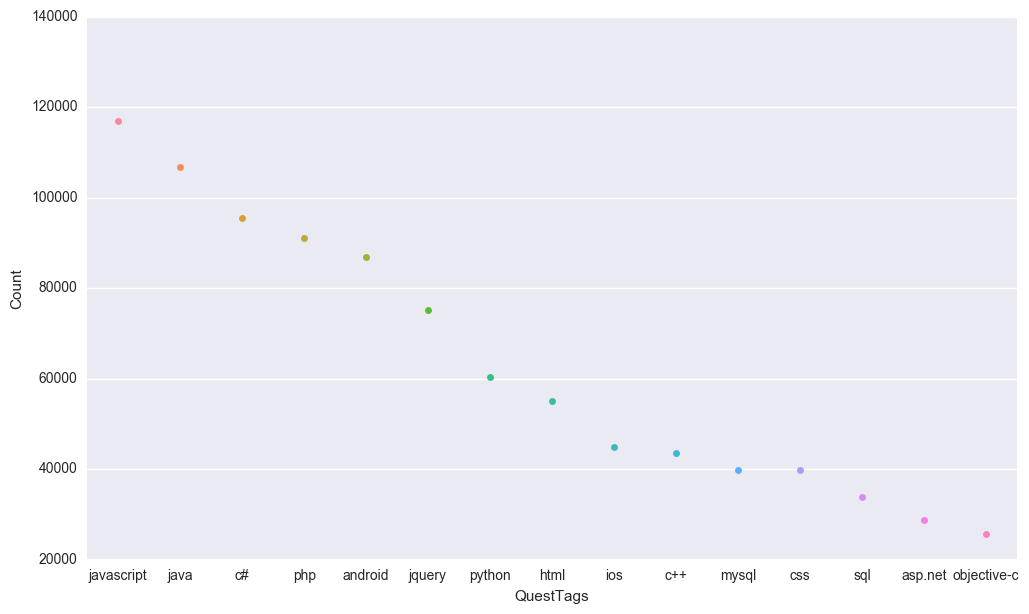

In [67]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(12,7))
ax2 = sns.stripplot(x="QuestTags", y="Count", data=topQuestTags)

In [150]:
questTags = commonQuestions[['QuestionId', 'QuestTags']].groupby('QuestionId').QuestTags.apply(list)

In [199]:
%store questTags

Stored 'questTags' (DataFrame)


In [158]:
questTags = questTags.reset_index()
len(questTags.QuestTags[1])

3

In [86]:
import pyfpgrowth as fp

In [161]:
questTagList = list(questTags.QuestTags)

In [165]:
#have 2 or more question tags in a question
questTagList2 = [tag for tag in questTagList if len(tag)>1]

In [166]:
patterns = fp.find_frequent_patterns(questTagList2, 1000)

In [167]:
patterns

{('.htaccess', 'apache'): 1841,
 ('.htaccess', 'apache', 'mod-rewrite'): 1053,
 ('.htaccess', 'mod-rewrite'): 1992,
 ('.htaccess', 'php'): 1767,
 ('.net', 'asp.net'): 1899,
 ('.net', 'asp.net', 'c#'): 1067,
 ('.net', 'c#'): 13567,
 ('.net', 'c#', 'winforms'): 1026,
 ('.net', 'vb.net'): 1322,
 ('.net', 'winforms'): 1430,
 ('.net', 'wpf'): 1222,
 ('actionscript-3',): 3663,
 ('actionscript-3', 'flash'): 1671,
 ('activerecord',): 2199,
 ('activerecord', 'ruby-on-rails'): 1699,
 ('ajax', 'html'): 1335,
 ('ajax', 'javascript'): 6433,
 ('ajax', 'javascript', 'jquery'): 3860,
 ('ajax', 'javascript', 'jquery', 'php'): 1085,
 ('ajax', 'javascript', 'php'): 1783,
 ('ajax', 'jquery'): 8454,
 ('ajax', 'jquery', 'php'): 2400,
 ('ajax', 'json'): 1275,
 ('algorithm',): 5886,
 ('amazon-ec2',): 1390,
 ('amazon-s3',): 1492,
 ('amazon-web-services',): 3031,
 ('android', 'android-activity'): 2093,
 ('android', 'android-asynctask'): 1139,
 ('android', 'android-fragments'): 2759,
 ('android', 'android-intent

In [169]:
rules = fp.generate_association_rules(patterns, 0.7)

In [175]:
rules #dict, cannot be sorted

{('.net', 'winforms'): (('c#',), 0.7174825174825175),
 ('activerecord',): (('ruby-on-rails',), 0.7726239199636198),
 ('android-activity',): (('android',), 0.9609733700642792),
 ('android-asynctask',): (('android',), 0.9810508182601206),
 ('android-fragments',): (('android',), 0.970112517580872),
 ('android-intent',): (('android',), 0.9796370075254538),
 ('android-layout',): (('android',), 0.9804476459994854),
 ('android-listview',): (('android',), 0.9782303370786517),
 ('android-studio',): (('android',), 0.8455341506129597),
 ('angularjs-directive',): (('angularjs',), 0.9842406876790831),
 ('apache', 'mod-rewrite'): (('.htaccess',), 0.7570093457943925),
 ('arraylist',): (('java',), 0.7654320987654321),
 ('boost',): (('c++',), 0.8778118609406953),
 ('c++11',): (('c++',), 0.8710462287104623),
 ('codeigniter',): (('php',), 0.759346317438997),
 ('css', 'javascript', 'jquery'): (('html',), 0.7034705988131631),
 ('css3', 'html'): (('css',), 0.82174688057041),
 ('d3.js',): (('javascript',), 0

In [7]:
tagCount = commonQuestions.groupby('QuestionId').QuestTags.size().reset_index()
tagCount = tagCount.rename(columns={0:'TagCount'})
commonQuestions = pd.merge(commonQuestions, tagCount, on='QuestionId')

In [8]:
%store commonQuestions

Stored 'commonQuestions' (DataFrame)


In [22]:
test = commonQuestions.drop_duplicates('QuestionId')

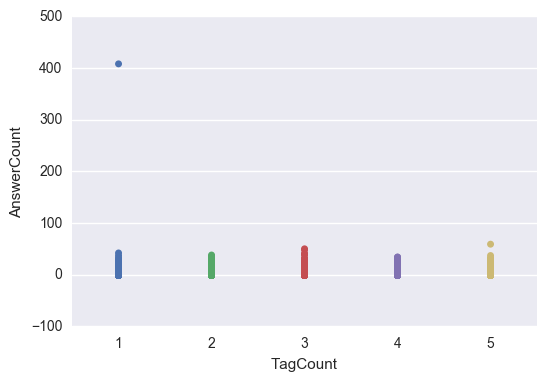

In [11]:
#scatterplot of AnswerCount against TagCount, one question with 408 answers
%matplotlib inline
ax3 = sns.stripplot(x="TagCount", y="AnswerCount", data=test)

In [13]:
%store ax3

Stored 'ax3' (AxesSubplot)


In [23]:
test.loc[test['AnswerCount'] == 408]

,QuestionId,QuestCreationDate,QuestClosedDate,QuestDeletionDate,QuestScore,QuestUserId,AnswerCount,QuestTags,QuestCreationYear,TagCount
9067,406760,2009-01-02 13:14:26,NaT,NaT,363,22656.0,408,language-agnostic,2009,1


In [26]:
#verified, it's true
stackSampleQuestions.loc[stackSampleQuestions['QuestionId']==406760].QuestTitle

5867    What's your most controversial programming opi...
Name: QuestTitle, dtype: object

In [2]:
%store -r stackQuestions
%store -r stackQuestionTags
%store -r stackSampleQuestions
%store -r commonQuestions
%store -r yearQuestTag
%store -r topYearQuestTag
%store -r questTags
%store -r ax3